# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Comment
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_json = requests.get(city_url).json()
        city_weather = json.dumps(response_json, indent = 4, sort_keys = True)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lat"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnozerskoye
Processing Record 2 of Set 1 | kalabo
Processing Record 3 of Set 1 | semporna
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | dazhong
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | lagdo
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | villa gesell
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | mangai
Processing Record 19 of Set 1 | hihifo
City not found. Skipping...
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | yeniseysk
Processing Record 22 of Set 1 

In [46]:
#test = f"{url}appid={weather_api_key}&q=Paris"
#r = requests.get(test).json()
#r_json = json.dumps(r, indent = 4, sort_keys = True)

#t = r_json["coord"]
#print(r_json["coord"])

test = f"{url}appid={weather_api_key}&q=Paris"
r = requests.get(test).json()
print(r)
t = r["coord"]
print(r["coord"])

{'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.05, 'feels_like': 280.21, 'temp_min': 282.24, 'temp_max': 283.58, 'pressure': 1018, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1707859461, 'sys': {'type': 2, 'id': 2012208, 'country': 'FR', 'sunrise': 1707807814, 'sunset': 1707843977}, 'timezone': 3600, 'id': 2988507, 'name': 'Paris', 'cod': 200}
{'lon': 2.3488, 'lat': 48.8534}


In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.set_index("City")

# Show Record Count
print(city_data_df.count())


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64


In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,krasnozerskoye,53.9828,53.9828,265.84,75,100,10.12,RU,1707859860
1,kalabo,-14.9700,-14.9700,296.10,57,79,2.19,ZM,1707859861
2,semporna,4.4818,4.4818,297.92,86,99,2.67,MY,1707859861
3,qaqortoq,60.7167,60.7167,273.39,99,100,2.71,GL,1707859862
4,dazhong,33.1997,33.1997,282.86,79,22,2.23,CN,1707859862


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,krasnozerskoye,53.9828,53.9828,265.84,75,100,10.12,RU,1707859860
1,kalabo,-14.9700,-14.9700,296.10,57,79,2.19,ZM,1707859861
2,semporna,4.4818,4.4818,297.92,86,99,2.67,MY,1707859861
3,qaqortoq,60.7167,60.7167,273.39,99,100,2.71,GL,1707859862
4,dazhong,33.1997,33.1997,282.86,79,22,2.23,CN,1707859862


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

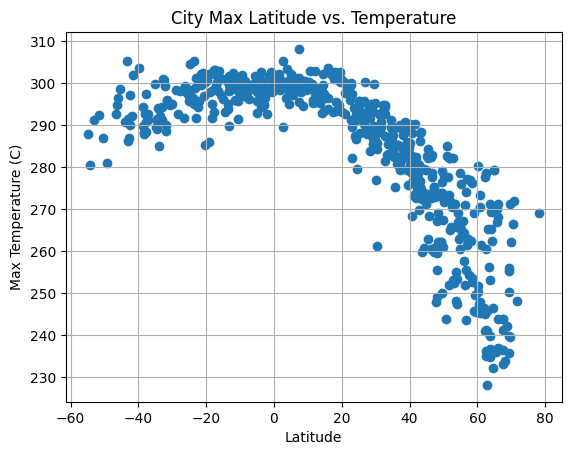

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

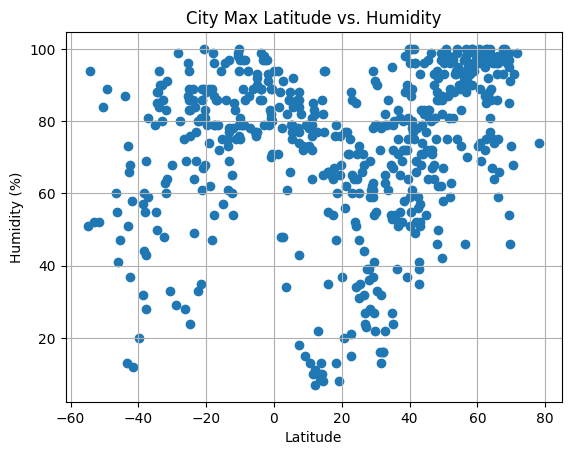

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

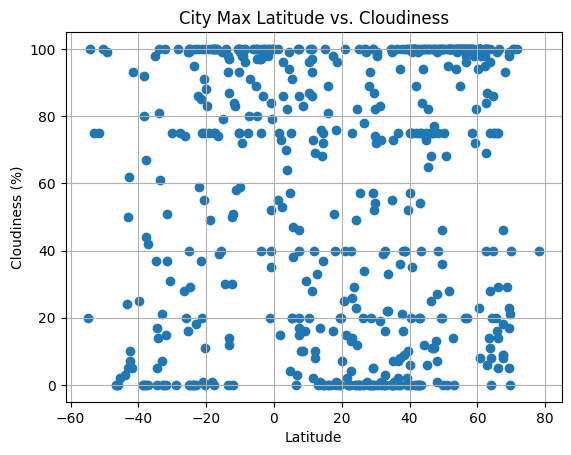

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

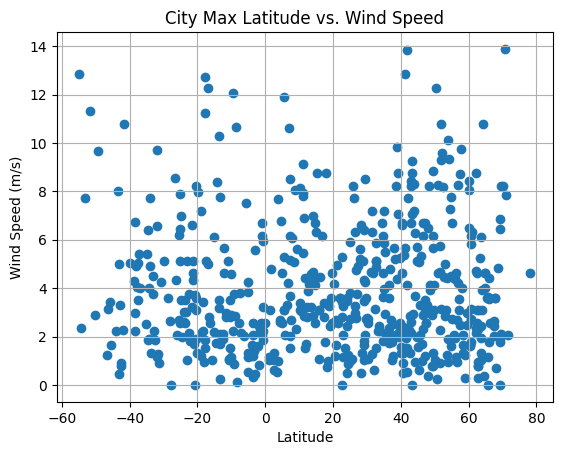

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_plotter(x_column, y_column):

    plt.scatter(x_column, y_column)

    # Incorporate the other graph properties
    #plt.ylabel()
    #plt.xlabel("Latitude")
    
    
    # fitting a linear regression line
    m, b = np.polyfit(x_column, y_column, 1)

    # adding the regression line to the scatter plot
    plt.plot(x_column, m*x_column + b)

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,krasnozerskoye,53.9828,53.9828,265.84,75,100,10.12,RU,1707859860
2,semporna,4.4818,4.4818,297.92,86,99,2.67,MY,1707859861
3,qaqortoq,60.7167,60.7167,273.39,99,100,2.71,GL,1707859862
4,dazhong,33.1997,33.1997,282.86,79,22,2.23,CN,1707859862
6,lagdo,9.0500,9.0500,300.54,15,16,2.30,CM,1707859863


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kalabo,-14.9700,-14.9700,296.10,57,79,2.19,ZM,1707859861
5,avarua,-21.2078,-21.2078,302.18,61,75,5.14,CK,1707859863
9,port lincoln,-34.7333,-34.7333,289.64,55,37,5.42,AU,1707859864
10,port-aux-francais,-49.3500,-49.3500,281.00,89,99,9.65,TF,1707859865
11,adamstown,-25.0660,-25.0660,297.65,83,99,7.89,PN,1707859866


###  Temperature vs. Latitude Linear Regression Plot

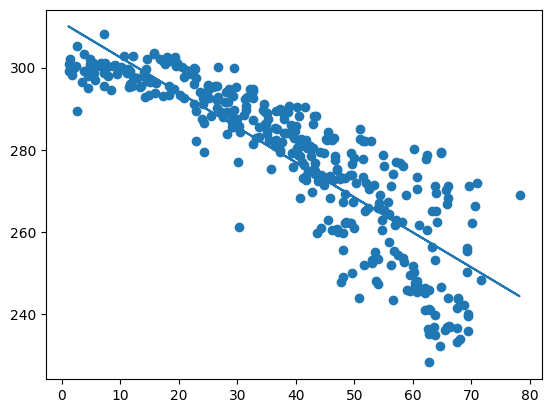

In [73]:
# Linear regression on Northern Hemisphere
lin_plotter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

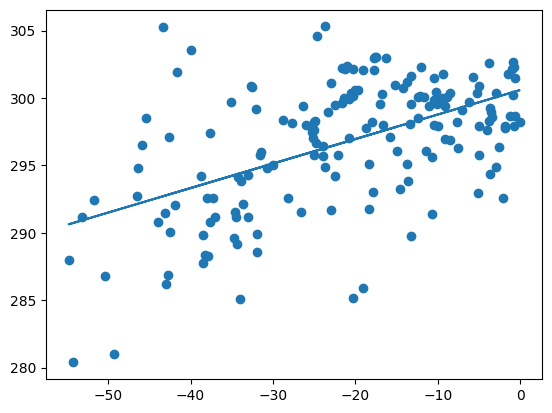

In [74]:
# Linear regression on Southern Hemisphere
lin_plotter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

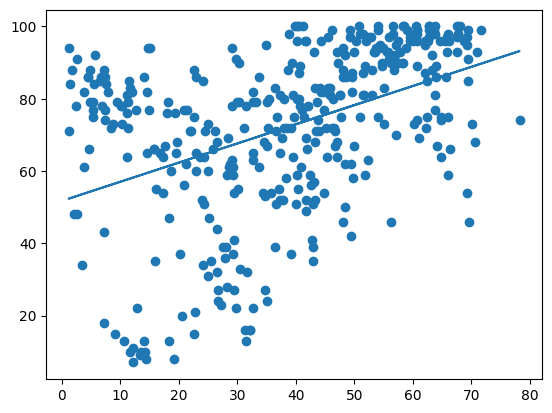

In [75]:
# Northern Hemisphere
lin_plotter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

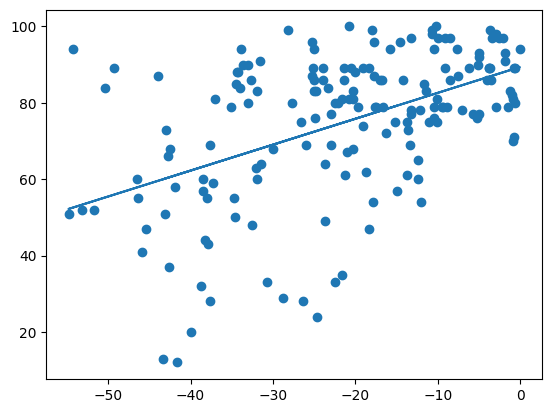

In [76]:
# Southern Hemisphere
lin_plotter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

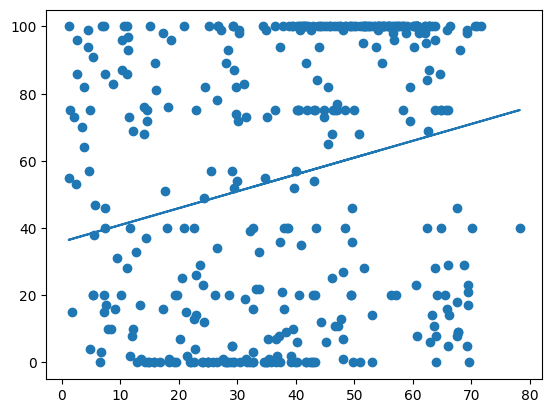

In [77]:
# Northern Hemisphere
lin_plotter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

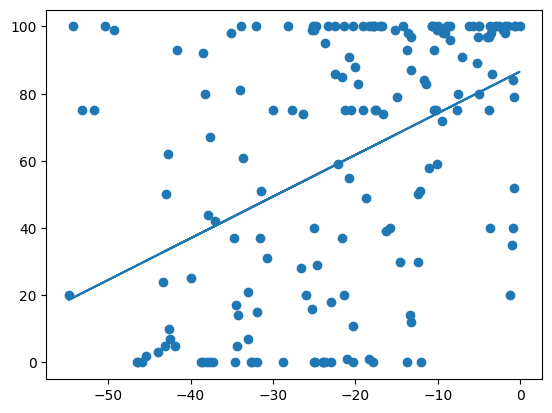

In [78]:
# Southern Hemisphere
lin_plotter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


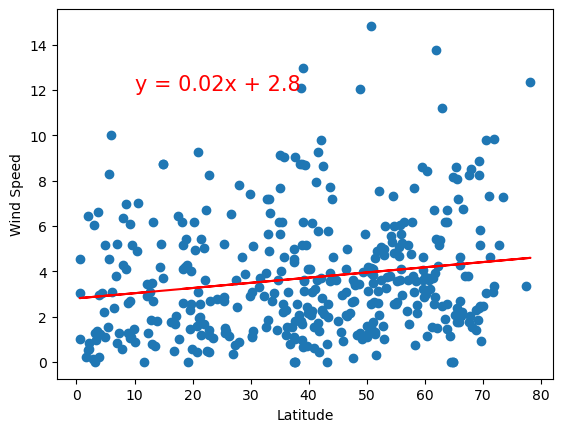

In [21]:
# Northern Hemisphere
lin_plotter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

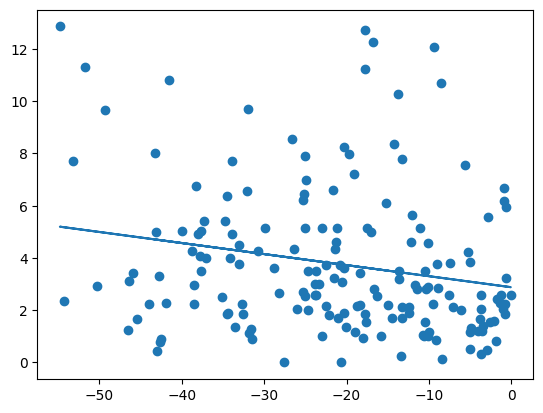

In [79]:
# Remember to print "The r-value is ..."
# Southern Hemisphere
lin_plotter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE